<a href="https://colab.research.google.com/github/manhtiendoan/CSC4850-Machine-Learning-AssignmentTwo/blob/main/Doan_Mike_Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CSC 4850 / 6850 / DSCI 4850 - Assisgment 2 - (350/400 points)

**Total points (350 undergraduate / 400 graduate)**

**Student Name: Mike Doan - mdoan4 - 002551968**

**Undergraduate**

## Instructions:

You are to make a copy of this notebook on your own Google Drive (if you don't have one, get one, it is free), and use the exact format provided. Any code needs to go in the code cells, and any 'text' answer/description needs to go in the proper text cell. We will not be looking for answers randomly placed so please read the instructions.

You are to use only the libraries provided in the next code cell. Any additional library is NOT allowed and will cause you to lose all the points that use said library's functions/functionality. You can use any functions given in the class code examples, but be very very careful of lifting anything 
'as-is' from the internet as it will be considerered plagiarism. 

**IMPORTANT: Make sure you use 1234 for your randomseed/random state. Failure to do so will make your answers not comparable to the answer key and you will get a zero on the whole assignment.**

## Submission format:

The submission for Assignment two will have two components:

1) You are to create a PDF from the PRINT out of this notebook with all cells executed sequentially. It is the student's responsibility to be able to do this and no excuses will be accepted, no legible PDF = zero grade. So practice and test before submission time. This PDF should be named LastName_FirstName-Assignment2.PDF

2) The student should create a GitHub repository for this assignment and properly title the repository Class_CODE-ClassName-AssignmentTwo. This repository should have a readme file and the Google Colab notebook in it. Note that colab can save a copy directly to GitHub so make sure you test this. Downloading the notebook file and uploading it directly will result in 200 points deduction. The link to your GitHub repository should be included as text/message in the iCollege submission drop, failure to include this link will result in a 100 point penalty. 

## Extra Credit for all:

Any student can get 50 extra credit points by doing two simple things (you need to do BOTH):

1) Make nice and pretty plots (only using the provided packages!)

2) Make your GitHub repo professional (this includes your own landing page as well). Examples: https://github.com/abhisheknaiidu/awesome-github-profile-readme


Remember that you will need a portfolio for your job search, and a professional looking repo will certainly impress recruiters/interviewers. So this is more of a favor to yourself! (yes, I follow this myself: https://github.com/jmbanda)


In [26]:
############## These are the only imports allowed to solve this homework, so make sure you do not add anything else down below

%matplotlib inline

import numpy as np
import pandas as pd
import sklearn 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()


#extra sklearn imports:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, recall_score, precision_score, classification_report

In [27]:
###Extra code block for functions

def graph_cm(y_test, y_test_pred, classes):
  # Compute confusion matrix
  cm = confusion_matrix(y_test, y_test_pred)

  #Plot the confusion matrix graph
  figure, axis = plt.subplots()
  im = axis.imshow(cm, interpolation='nearest', cmap=plt.cm.Reds)
  axis.figure.colorbar(im, ax=axis)
  axis.set(xticks=np.arange(cm.shape[1]),yticks=np.arange(cm.shape[0]),xticklabels=classes,yticklabels=classes,xlabel='Predicted label',ylabel='True label')
  #I wanted to center the labels without adding the white stripes along the graph but I could not find a workaround

  # Add values to confusion matrix
  thresh = cm.max() / 2.
  for i in range(cm.shape[0]):
      for j in range(cm.shape[1]):
          axis.text(j, i, format(cm[i, j], 'd'),
                  ha="center", va="center",
                  color="white" if cm[i, j] > thresh else "black")

  plt.show()

def visualize_classifier(model, X, y, ax=None, cmap='rainbow'):
    ax = ax or plt.gca()
    
    # Plot the training points
    ax.scatter(X[:,0], X[:,1], c=y, s=30, cmap=cmap,
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # fit the estimator
    model.fit(X, y)
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Create a color plot with the results
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap=cmap, zorder=1)

    ax.set(xlim=xlim, ylim=ylim)
     

def get_metrics(name, model, test_data, test_label):
  pred = model.predict(test_data)
  return [name, accuracy_score(test_label, pred), precision_score(test_label, pred,average = 'weighted'), recall_score(test_label, pred,average = 'weighted')]

Using the Wine dataset from sklearn:

In [28]:
#get the wine dataset from sklearn and take a look at the description provided
from sklearn import datasets
wine = datasets.load_wine()

# Question 1 (10 points)

What can you say about the dataset (use code to descirbe it)? any particular things of interest? Find at least two things that you find interesting.

wine dataset is of type <class 'sklearn.utils.Bunch'>
The data set contains the keys dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])
.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8  

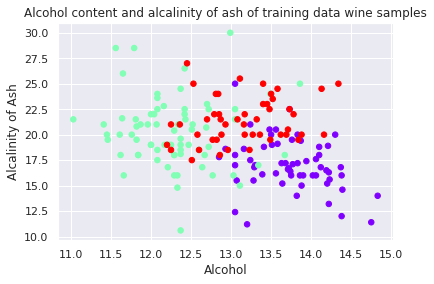

In [29]:
##### Code block for Question 1
#Figuring out what data type wine is
%matplotlib inline
print("wine dataset is of type " + str(type(wine)))

#Extract keys from the wine data bunch
print("The data set contains the keys " + str(wine.keys()))

#Print the wine data bunch description
print(wine.get('DESCR'))

#Later questions seem to put emphasis on alcohol content and alkalinity of ash, 
#therefore I will look at this graph individually.
data = wine.get('data')
label = wine.get('target')
plt.xlabel("Alcohol")
plt.ylabel("Alcalinity of Ash")
plt.title("Alcohol content and alcalinity of ash of training data wine samples")
plt.scatter(data[:, 0], data[:, 3], c=label, s=30, cmap='rainbow');

Notable findings about the data:
- The data contains 178 instances of wine metrics across 3 classes
- There seems to be a contradiction in the data description? (It says at the top that there are 50 instances of each class in the data (which would add up to 150), but it is explicitly stated that the distribution of classes is: class_0 (59), class_1 (71), class_2 (48)
- The data is split among 13 features.
- Looking at the plot of alcohol content and alcalinity of ash, we see that the data seems to form 3 distinct clusters, which do not seem to be linearly seperable

# Question 2 (10 points)

Remove class_2, so it becomes a binary problem now. Split the dataset into a testing and a training set using 65% of the data for training and the rest for testing. Use the built-in sklearn functionality for this, any other way will not be graded.

In [30]:
##### Code block for Question 2
%matplotlib inline
from sklearn.model_selection import train_test_split


#Remove class_2 from the dataset
raw_data = wine.get('data')
raw_label = wine.get('target')
data = []
label = []
for x in range(len(raw_label)):
  if raw_label[x] < 2:
    data.append(raw_data[x])
    label.append([raw_label[x]])

data = wine.get('data')[:130]
label = wine.get('target')[:130]
X_train, X_test, y_train, y_test = train_test_split(data, label 
                                                    ,random_state=1234
                                                    , test_size=0.35)

#print(len(X_train), len(X_test),len(y_train),len(y_test)
#,len(X_train)/len(data)) #Verify that data has been split
#print(y_test, y_train) #Verify data has been shuffled

# Question 3 (30 points)

Use the perceptron algorithm (with default settings and the correct seed) to build a model on the training set and report the model's accuracy.

In [31]:
##### Code block for Question 3
#https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score

#Initialize the model with random state 1234
perceptron = Perceptron(random_state=1234)
#Fit the model according to training data and label
perceptron.fit(X_train, y_train)

#Use the model to predict labels of the test data set
y_train_pred = perceptron.predict(X_train)
#Give accuracy results by comparing them with actual test labels
print("The model has an training accuracy of " + str(accuracy_score(y_train, y_train_pred)))

The model has an training accuracy of 0.75


# Question 4 (20 points)

Show the classification report for the built model. In the text cell, following the code block for question 4, descibe what findings can be infered from the classification report. Mention at least 3 observations.

In [32]:
#### Code block for Question 4

from sklearn.metrics import classification_report
print(classification_report(y_train, y_train_pred
                            , target_names=wine.get('target_names')[:2]))

count_0, count_1 = 0, 0
for x in y_train:
  if x == 0:
      count_0 += 1
  else:
      count_1 += 1

print("The percentage of data that is class_0 is: " + str(count_0/len(y_train)))

              precision    recall  f1-score   support

     class_0       1.00      0.47      0.64        40
     class_1       0.68      1.00      0.81        44

    accuracy                           0.75        84
   macro avg       0.84      0.74      0.73        84
weighted avg       0.83      0.75      0.73        84

The percentage of data that is class_0 is: 0.47619047619047616


Textual answer to question 4 goes here.

- The model has perfect precision on class_0, meaning that every sample it labeled class_0 was actually class_0. On the contrary it only had a 0.68 precision on class_1, meaning that it labeled many samples class_1 when they should have been class_0
- The model has a recall of 0.47 on class_0. meaning that it missed more than half of all samples in the class. On the contrary it has perfect recall on class_1, meaning that it labeled all class_1 samples as class_1
- The model has an accuracy of 75%, which considering that the data has a roughly 47-53 split, means that the model is notably better than simply randomly guessing or predicting a single class for all samples.


# Question 5 (30 points)

Use the trained model to make predictions on the test set. Output AND plot the confusion matrix from the model's predictions. 

In the second code cell, plot side by side: On the left side, the test set and its labels (using features Alcohol as the X axis and Alcalinity of Ash as the Y axis) with each point colored depending its class label. On the right side, the actual predictions (use the same Alcohol as the X axis and Alcalinity of Ash as the Y axis) with each point colored depending on its class label.

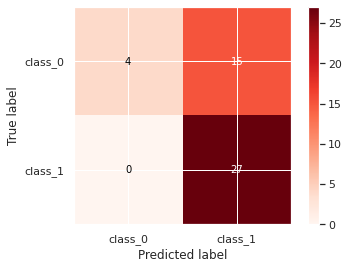

Confusion matrix:
[[ 4 15]
 [ 0 27]]
Because this is a binary classification problem, I will treat class_0 as 'true' and class_1 as 'false'

The model makes 4 true negatives
The model makes 0 false negatives
The model makes 27 true positives
The model makes 15 false positives

The model has an accuracy of: 0.6739130434782609
The model has a precision of: 0.6428571428571429
The model has a recall of: 1.0


In [33]:
##### Code block for Question 5 - part 1
%matplotlib inline
from sklearn.metrics import confusion_matrix, precision_score, recall_score

#Making predictions on the test set using the model
y_test_pred = perceptron.predict(X_test)

#Graph of confusion matrix
graph_cm(y_test, y_test_pred, ["class_0", "class_1"])

#Creating a confusion matrix
print("Confusion matrix:")
print(confusion_matrix(y_test, y_test_pred))
tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred).ravel()
print("Because this is a binary classification problem, I will treat class_0 as 'true' and class_1 as 'false'")
print("\nThe model makes " + str(tn) + " true negatives")
print("The model makes " + str(fn) + " false negatives")
print("The model makes " + str(tp) + " true positives")
print("The model makes " + str(fp) + " false positives")

#Checking performance metrics
print("\nThe model has an accuracy of: "+str(accuracy_score(y_test, y_test_pred)))
print("The model has a precision of: "+str(precision_score(y_test, y_test_pred)))
print("The model has a recall of: "+str(recall_score(y_test, y_test_pred)))

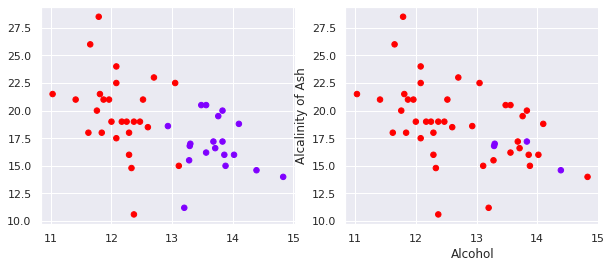

In [34]:
##### Code block for Question 5 - part 2
%matplotlib inline
#Graphing the correct labeled data against predicted labels
figure, axis = plt.subplots(1, 2)
plt.xlabel("Alcohol")
plt.ylabel("Alcalinity of Ash")
figure.set_figwidth(10)

axis[0].scatter(X_test[:, 0], X_test[:, 3], c=y_test, s=30, cmap='rainbow');
axis[1].scatter(X_test[:, 0], X_test[:, 3], c=y_test_pred, s=30, cmap='rainbow');

# Question 6 (10 points) 

a) Do the plot right plot on Question 5 - part 2 match the confusion matrix of part 1?

b) Any interesting observations from the predictions and the model performance? (write at least 2)

Textual answer to question 6 a goes here.

They do, on the right plot there are clearly 4 points in purple, which match up with the 4 true positives from the confusion matrix.

The 4 points in purple also match up with purple points from the original graph, so we can confirm that they are actually true positives.

The rest of the graph is in red, which confirms the false negatives and true negatives accounting for the remaining predictions.

Textual answer to question 6 b goes here.

The model seems to perform pretty poorly on both the training set and the testing set, having an accuracy of 60-70% on both data sets. Considering that this is a binary classification problem, that means that the model is only slightly better than a random 50-50


There is a roughly 8% drop in performance between predictions on the training set versus the testing set, which means that the model does overfit to an extent but does not seem overly so.


# Question 7 (10 points)

Reload the Wine dataset and split the dataset into a testing and a training set using 65% of the data for training and the rest for testing. Use the built-in sklearn functionality for this, any other way will not be graded.

In [35]:
##### Code block for Question 7

#reload the wine dataset
from sklearn import datasets
wine = datasets.load_wine()
data2 = wine.get('data')
label2 = wine.get('target')
#split the data set into training and testing data just like question 2
X2_train, X2_test, y2_train, y2_test = train_test_split(data2, label2 ,random_state=1234, test_size=0.35)

# Question 8 (30 points)

Use the Decision Tree algorithm (with default settings and the correct seed) to build a model on the training set and report the model's accuracy.

In [36]:
##### Code block for Question 8

#import tree and create the model
from sklearn import tree
decision_tree = tree.DecisionTreeClassifier(random_state = 1234)
decision_tree = decision_tree.fit(X2_train, y2_train)


y2_train_pred = decision_tree.predict(X2_train)
print("The model has an training accuracy of: " + str(accuracy_score(y2_train, y2_train_pred)))

The model has an training accuracy of: 1.0


# Question 9 (20 points)

Show the classification report for the built model. In the text cell, following the code block for question 9, descibe what findings can be infered from the classification report. Mention at least 3 observations.

In [37]:
##### Code block for Question 9

from sklearn.metrics import classification_report
print(classification_report(y2_train, y2_train_pred, target_names=wine.get('target_names')))

              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        40
     class_1       1.00      1.00      1.00        45
     class_2       1.00      1.00      1.00        30

    accuracy                           1.00       115
   macro avg       1.00      1.00      1.00       115
weighted avg       1.00      1.00      1.00       115



Textual answer to question 9 goes here.

- The model has perfect accuracy, meaning that it only made correct predictions
- The model has perfect precision, which means that every prediction it made was correct
- The model has perfect recall, which means for every label, it made the correct prediction

(These three statements sound like the same thing because in the case of perfect performance metrics, the only real conclusion to be drawn is that the model made 0 mistakes)

# Question 10 (30 points)

Use the trained model to make predictions on the test set. Output AND plot the confusion matrix from the model's predictions. 

In the second code cell, plot side by side: On the left side, the test set and its labels (using features Alcohol as the X axis and Alcalinity of Ash as the Y axis) with each point colored depending its class label. On the right side, the actual predictions (use the same Alcohol as the X axis and Alcalinity of Ash as the Y axis) with each point colored depending on its class label.

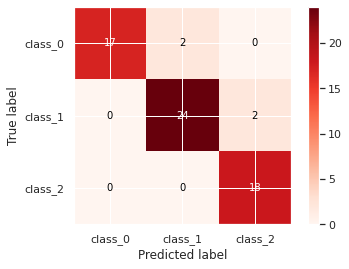


Raw output of confusion matrix: 

[[17  2  0]
 [ 0 24  2]
 [ 0  0 18]]

From the confusion matrix we see that the model misclassified 2 class_0 examples as class_1 and 2 class_1 examples as class_2
All the other predictions are correct

Classification report: 
              precision    recall  f1-score   support

     class_0       1.00      0.89      0.94        19
     class_1       0.92      0.92      0.92        26
     class_2       0.90      1.00      0.95        18

    accuracy                           0.94        63
   macro avg       0.94      0.94      0.94        63
weighted avg       0.94      0.94      0.94        63



In [38]:
##### Code block for Question 10 - part 1
%matplotlib inline
y2_test_pred = decision_tree.predict(X2_test)
graph_cm(y2_test, y2_test_pred, ["class_0", "class_1", "class_2"])

print("\nRaw output of confusion matrix: \n")
print(confusion_matrix(y2_test, y2_test_pred))
print("\nFrom the confusion matrix we see that the model misclassified 2 class_0 examples as class_1 and 2 class_1 examples as class_2\nAll the other predictions are correct")
print("\nClassification report: ")
print(classification_report(y2_test, y2_test_pred, target_names=wine.get('target_names')))


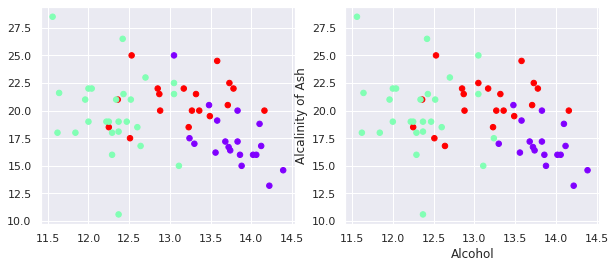

In [39]:
##### Code block for Question 10 - part 2
%matplotlib inline
figure, axis = plt.subplots(1, 2)
plt.xlabel("Alcohol")
plt.ylabel("Alcalinity of Ash")
figure.set_figwidth(10)

axis[0].scatter(X2_test[:, 0], X2_test[:, 3], c=y2_test, s=30, cmap='rainbow');
axis[1].scatter(X2_test[:, 0], X2_test[:, 3], c=y2_test_pred, s=30, cmap='rainbow');
plt.show()

# Question 11 (30 points) 

a) Do the plot right plot on Question 10 - part 2 match the confusion matrix of part 1?

b) Any interesting observations from the predictions and the model performance? (write at least 2)

c) Plot the figure from question 10 - part 2 using the `visualize_classifier` function given during the class example from 2/20/2023.

Textual answer to question 11 a goes here.

* Yes, most examples match up one to one between the two plots, except for two class_0 samples (colored in purple) being mislabeled as class_1 (in green), as well as two class_1 examples (in green) being mislabeled as class_2 (in red). 
* There are no mislabeled examples between classes 2 and 1.




Textual answer to question 11 b goes here.

* The model performs very well on the testing data on this specific split, having an average of 94% on all three performance metrics (accuracy, recall and precision)
* From the data, the model does seem to overfit to some extent to the training data, having a 6% drop in performance between the training and testing set

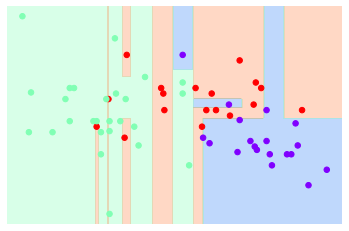

In [40]:
##### Code block for Question 11 - part c
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier
visualize_classifier(DecisionTreeClassifier(random_state=1234), X2_test[:,[0,3]], y2_test)
#I am technically using a different data set in this instance because the visualize_classifier only works on 2d data

# Question 12 (10 points)

Reload the Wine dataset and split the dataset into a testing and a training set using 65% of the data for training and the rest for testing. Use the built-in sklearn functionality for this, any other way will not be graded.

In [41]:
##### Code block for Question 12

#reload the wine dataset
from sklearn import datasets
wine = datasets.load_wine()
data3 = wine.get('data')
label3 = wine.get('target')
#split the data set into training and testing data just like question 2
X3_train, X3_test, y3_train, y3_test = train_test_split(data3, label3 ,random_state=1234, test_size=0.35)

# Question 13 (30 points)

Use the Logistic Regression (with as this is a multi-class problem, use the **One Vs Rest algorithm** we must use `liblinear` solver and the correct seed) to build a model on the training set and report the model's accuracy.

In [42]:
##### Code block for Question 13

from sklearn.linear_model import LogisticRegression

logistic_regression = LogisticRegression(multi_class = 'ovr', solver='liblinear',random_state = 1234).fit(X3_train, y3_train)
y3_train_pred = logistic_regression.predict(X3_train)
print("The model has an training accuracy of: " + str(accuracy_score(y3_train, y3_train_pred)))

The model has an training accuracy of: 0.9826086956521739


# Question 14 (20 points)

Show the classification report for the built model. In the text cell, following the code block for question 14, descibe what findings can be infered from the classification report. Mention at least 3 observations.

In [43]:
##### Code block for Question 14
from sklearn.metrics import classification_report
print(classification_report(y3_train, y3_train_pred, target_names=wine.get('target_names')))

              precision    recall  f1-score   support

     class_0       1.00      0.97      0.99        40
     class_1       0.96      1.00      0.98        45
     class_2       1.00      0.97      0.98        30

    accuracy                           0.98       115
   macro avg       0.99      0.98      0.98       115
weighted avg       0.98      0.98      0.98       115



Textual answer to question 14 goes here.
* The model has a training accuracy of 98%, meaning almost all predictions it makes are accurate
* The model has an weighted average training recall of 98%, meaning that it did not miss many labels among the correct ones
* The model has an weighted average training precision of 98%, meaning that among the predictions that it did make, there were very few that were of a different class
* Overall logistic regression seems to be able to model this specific split of the training data set

# Question 15 (30 points)

Use the trained model to make predictions on the test set. Output AND plot the confusion matrix from the model's predictions. 

In the second code cell, plot side by side: On the left side, the test set and its labels (using features Alcohol as the X axis and Alcalinity of Ash as the Y axis) with each point colored depending its class label. On the right side, the actual predictions (use the same Alcohol as the X axis and Alcalinity of Ash as the Y axis) with each point colored depending on its class label.

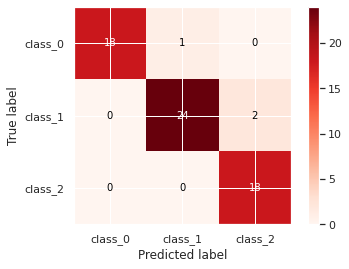


Raw output of confusion matrix: 

[[18  1  0]
 [ 0 24  2]
 [ 0  0 18]]

From the confusion matrix we see that the model misclassified 1 class_0 example as class_1 and 2 class_1 examples as class_2
All the other predictions are correct

Classification report: 
              precision    recall  f1-score   support

     class_0       1.00      0.95      0.97        19
     class_1       0.96      0.92      0.94        26
     class_2       0.90      1.00      0.95        18

    accuracy                           0.95        63
   macro avg       0.95      0.96      0.95        63
weighted avg       0.95      0.95      0.95        63



In [44]:
##### Code block for Question 15 - part 1
%matplotlib inline
y3_test_pred = logistic_regression.predict(X3_test)
graph_cm(y3_test, y3_test_pred, ["class_0", "class_1", "class_2"])

print("\nRaw output of confusion matrix: \n")
print(confusion_matrix(y3_test, y3_test_pred))
print("\nFrom the confusion matrix we see that the model misclassified 1 class_0 example as class_1 and 2 class_1 examples as class_2\nAll the other predictions are correct")
print("\nClassification report: ")
print(classification_report(y3_test, y3_test_pred, target_names=wine.get('target_names')))

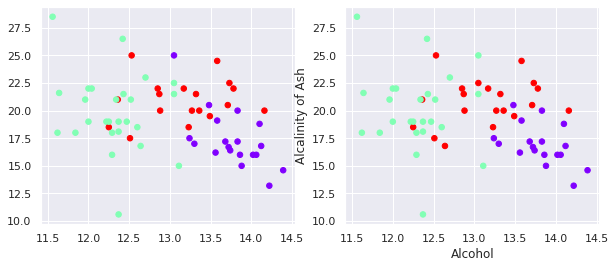

In [45]:
##### Code block for Question 15 - part 2
%matplotlib inline
figure, axis = plt.subplots(1, 2)
plt.xlabel("Alcohol")
plt.ylabel("Alcalinity of Ash")
figure.set_figwidth(10)

axis[0].scatter(X3_test[:, 0], X3_test[:, 3], c=y3_test, s=30, cmap='rainbow');
axis[1].scatter(X3_test[:, 0], X3_test[:, 3], c=y3_test_pred, s=30, cmap='rainbow');
plt.show()

# Question 16 (20 points) 

a) Do the plot right plot on Question 15 - part 2 match the confusion matrix of part 1?

b) Any interesting observations from the predictions and the model performance? (write at least 2)


Textual answer to question 16 a goes here.

Yes they do, most data points match up one to one, but there is one class_0 (purple) sample that got labeled as class_1 (green) and two class_1 samples (green) that got labeled as class_2 (red)

Textual answer to question 16 b goes here.

* The model seems to perform quite well on this specific split of the test set, averaging around 95% on all three performance metrics
* There was only a 3-4% drop on average in performance metrics between the training and testing set, so it is safe to say that the model does not overfit too much to the training set (for this specific split of data)

# Question 17 (10 points)

Create AND display dataframe containing in each row the accruacy, precision, recall for each of the models built. 

In the textual answer cell, discuss which one is the best performing model and why?

In [46]:
##### Code block for Question 17

#In order, the models tested on wine data split with random_state '1234' are: perceptron, decision tree and logistic regression
from sklearn.metrics import accuracy_score, precision_score, recall_score

#Function for getting the performance metrics of a model
def get_metrics(name, model, test_data, test_label):
  pred = model.predict(test_data)
  return [name, accuracy_score(test_label, pred), precision_score(test_label, pred,average = 'weighted'), recall_score(test_label, pred,average = 'weighted')]

#Get the performance metrics for each of the models
perceptron_performance = get_metrics("Perceptron", perceptron, X_test, y_test)
decision_tree_performance = get_metrics("Decision Tree", decision_tree, X2_test, y2_test)
logistic_regression_performance = get_metrics("Logistic Regression", logistic_regression, X3_test, y3_test)

#Creating a dataframe
dataframe_data = [["Model", "Accuracy", "Weighted Precision", "Weighted Recall"], perceptron_performance, decision_tree_performance, logistic_regression_performance]
df= pd.DataFrame(data = dataframe_data)
#print("Raw output of dataframe:\n" + str(df) )
df.style

,0,1,2,3
0,Model,Accuracy,Weighted Precision,Weighted Recall
1,Perceptron,0.673913,0.790373,0.673913
2,Decision Tree,0.936508,0.939683,0.936508
3,Logistic Regression,0.952381,0.954921,0.952381


Textual answer to question 17 goes here.

* From the performance metrics, it is easy to see that with the highest performance metrics in all three categories, logistic regression is the best performing model.

* Intuitively this also makes the most sense, going back to question 1 where I first graphed the data it was clearly not linearly seperable so the perceptron model would have never performed well to begin with.

* The decision tree model also seemed to highly overfit to the training set, with some decision boundaries that only account for a single data point.

* The outlier is logistic regression, which does not have any obvious drawbacks that would show themselves in the given data. So it makes sense that it was the best performer.


# Graduate Student Question: (50 points)

Modify the `visualize_classifier` function provided during the 2/20/2023 class to be able to work in 3 dimensions (currently only works in two dimensions). Take the Decision Tree classifier model from Question 8 and plot the separation of the classes using the following axes: (Alcohol as the X axis and Alcalinity of Ash as the Y axis, and Ash as the Z axis).


In [47]:
###### Code block for Graduate Student Question

#The two code blocks following this one illustrate the visualize_classifier function


#Density controls how smooth the contours look, also scales execution time of code exponentially, increase with caution
#Blur controls the visibility of the inner layers of the contours

#Default values of density and blur currently showcase the boundaries best according to my testing, but other values might be suitable if one wishes 
#to look at the contours of the inner layers

#This approach I took is almost the same as the one taken by ax.contourf, just that instead of connecting the points into
#a contour, I render the lines as individual points
def visualize_classifier3d(model, X, y, ax = None, cmap = 'Rainbow', density = 100, blur = 0.01, angle = 30):
  # Plot the training points
  fig = plt.figure(figsize = (10,10))
  ax = plt.axes(projection='3d')
  ax.scatter(X[:,0], X[:,1], X[:,2],cmap='rainbow',c = y, clim=(y.min(), y.max()), zorder=3)
  ax.axis('tight')
  xlim = ax.get_xlim()
  ylim = ax.get_ylim()
  zlim = ax.get_zlim()

  # fit the estimator
  model.fit(X, y)
  xx, yy, zz = np.meshgrid(np.linspace(*xlim, num=density),np.linspace(*ylim, num=density), np.linspace(*zlim, num=density))
  Z = model.predict(np.c_[xx.ravel(), yy.ravel(), zz.ravel()]).reshape(xx.shape)

  # Create a color plot with the results
  ax.scatter(xx.ravel(), yy.ravel(), zz.ravel(), cmap='rainbow',c = Z.ravel(), clim=(y.min(), y.max()), zorder=3, alpha = blur)
  ax.set(xlim=xlim, ylim=ylim, zlim = zlim)


  ax.view_init(angle)
  plt.show()

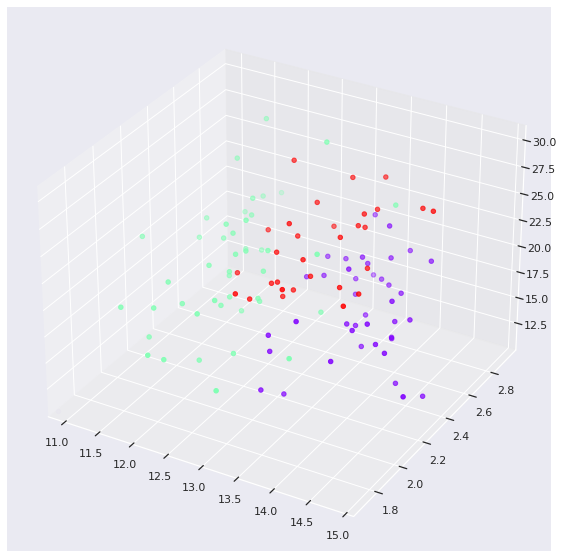

In [48]:
data = wine.get('data')
label = wine.get('target')
data = data[:, [0, 2 ,3]]
X, X4_test, y, y4_test = train_test_split(data, label ,random_state=1234, test_size=0.35)

#Points illustrated in 3d without the contours
visualize_classifier3d(DecisionTreeClassifier(random_state=1234), X, y, density = 1)

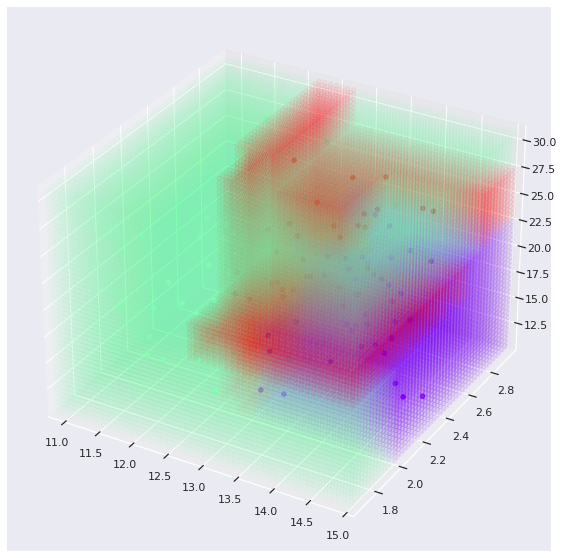

In [51]:
#Points illustrated in 3d with contours (points are the same color as the contours so it might be blurry)
%matplotlib inline
visualize_classifier3d(DecisionTreeClassifier(random_state=1234), X, y, density = 50, blur = 0.05)